In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import scipy.io as scipio
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as ly
import datetime
import mapbox
import folium

## Introduction

The data comes from two separate platforms;
- __Hot Pepper Gourmet__ (hpg): An online booking site that allows users to search and book restaurants, read up on restaurant information, and find restaurant coupons. It is similar to Yelp. It has a website and applications optimized for several smartphones. 
- __AirREGI__ (air): This is used by the restaurant side as an all-in-one POS app. Allows sales and inventory management, as well as reservation control. Similar to Square.

The goal is to predict the total number of visitors for a given restaurant and a given date. 

__Dates__: The training data covers the dates from 2016 until April 2017. The test set covers the last week of April and May of 2017. The test set is split based on time (the public fold coming first, the private fold following the public) and covers a chosen subset of the air restaurants. Note that the test set intentionally spans a holiday week in Japan called the "Golden Week." The training set omits days where the restaurants were closed.

__Data Files__

- __air_reserve.csv__: This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

- __hpg_reserve.csv__: This file contains reservations made in the hpg system.

- __air_store_info.csv__: This file contains information about select air restaurants. Column names and contents are self-explanatory.

- __hpg_store_info.csv__: This file contains information about select hpg restaurants. Column names and contents are self-explanatory.

- __store_id_relation.csv__: This file allows you to join select restaurants that have both the air and hpg system.

- __ air_visit_data.csv__: This file contains historical visit data for the air restaurants.

- __date_info.csv__: This file gives basic information about the calendar dates in the dataset.

In [2]:
## Load air data
air_reserve = pd.DataFrame(pd.read_csv('data/air_reserve.csv'))
air_store = pd.DataFrame(pd.read_csv('data/air_store_info.csv'))
air_visit = pd.DataFrame(pd.read_csv('data/air_visit_data.csv'))
## Load hpg data
hpg_reserve = pd.DataFrame(pd.read_csv('data/hpg_reserve.csv'))
hpg_store = pd.DataFrame(pd.read_csv('data/hpg_store_info.csv'))
## Load other data
store_id =  pd.DataFrame(pd.read_csv('data/store_id_relation.csv'))
date_info = pd.DataFrame(pd.read_csv('data/date_info.csv'))

In [3]:
## Convert visit_date column from str to datetime timestamp
air_visit['visit_date'] = air_visit['visit_date'].\
apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

air_visit.head()

air_store_id visit_date  visitors
0  air_ba937bf13d40fb24 2016-01-13        25
1  air_ba937bf13d40fb24 2016-01-14        32
2  air_ba937bf13d40fb24 2016-01-15        29
3  air_ba937bf13d40fb24 2016-01-16        22
4  air_ba937bf13d40fb24 2016-01-18         6

In [4]:
type(air_visit['visit_date'][0])

pandas._libs.tslib.Timestamp

## Where are the restaurants?

In [5]:
# both air_store and hpg_store have latitude longitude cols

# Map of AirReg Restaurants
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
 
for i in range(0,len(air_store)):
    folium.Marker([air_store.iloc[i]['latitude'], air_store.iloc[i]['longitude']], \
                  popup=air_store.iloc[i]['air_store_id']).add_to(m)

m.fit_bounds([[50,145],[30, 140]])
# m.save('airREG_latlong.html')

In [6]:
%%html 
<a href="airREG_latlong.html">JapanRestMap</a> ## here's a link to the map

In [7]:
m

In [8]:
# both air_store and hpg_store have latitude longitude cols

m2 = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
 
## plot HPF restaurants
for i in range(0,len(air_store)):
    folium.Marker([hpg_store.iloc[i]['latitude'], hpg_store.iloc[i]['longitude']], \
                  popup=air_store.iloc[i]['air_store_id']).add_to(m2)

m2.fit_bounds([[50,145],[30, 140]])
# m2.save('HPG_latlong.html')

In [9]:
%%html 
<a href="HPG_latlong.html">JapanRestMap</a> ## here's a link to the map

In [10]:
m2

In [ ]:
### Plot unique rest ids after merging

## Daily Visitors

(-5, 200)

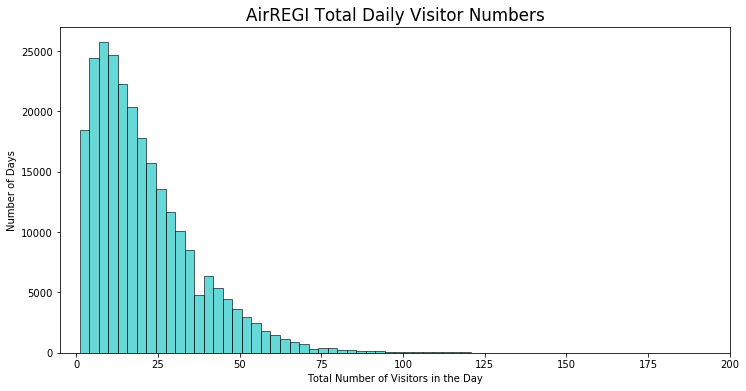

In [11]:
## Plot the visitor numbers vs days
plt.figure(figsize=(12,6))
plt.hist(air_visit['visitors'], bins=300, color='c', alpha=0.6, edgecolor='black')
plt.rcParams['font.size'] = 14
plt.title('AirREGI Total Daily Visitor Numbers')
plt.xlabel('Total Number of Visitors in the Day')
plt.ylabel('Number of Days')
plt.xlim(-5, 200)

(-5, 60)

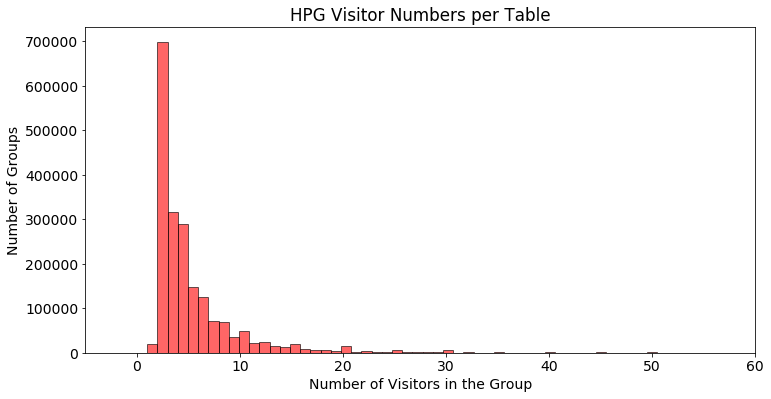

In [12]:
## Plot the HPG visitor numbers per reservation
plt.figure(figsize=(12,6))
plt.hist(hpg_reserve['reserve_visitors'], bins=100, color='r', alpha=0.6, edgecolor='black')
plt.rcParams['font.size'] = 14
plt.title('HPG Visitor Numbers per Table')
plt.xlabel('Number of Visitors in the Group')
plt.ylabel('Number of Groups')
plt.xlim(-5, 60)

(-5, 60)

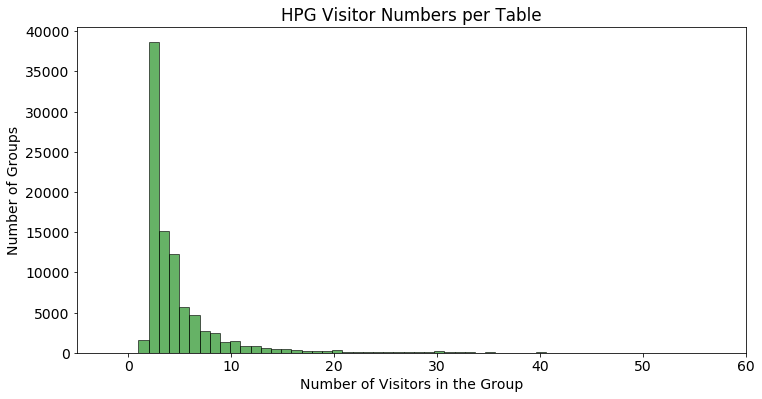

In [13]:
## Plot the AirREG visitor numbers per reservation
plt.figure(figsize=(12,6))
plt.hist(air_reserve['reserve_visitors'], bins=100, color='g', alpha=0.6, edgecolor='black')
plt.rcParams['font.size'] = 14
plt.title('HPG Visitor Numbers per Table')
plt.xlabel('Number of Visitors in the Group')
plt.ylabel('Number of Groups')
plt.xlim(-5, 60)
# plt.xticks(np.linspace(0, 60, 30))

In [14]:
## Add 'month' and 'year' columns 
air_visit['month'] = air_visit['visit_date'].apply(lambda x: x.month)
air_visit['year'] = air_visit['visit_date'].apply(lambda x: x.year)
rest_2016 = list(set(list(air_visit[air_visit['year']==2016]['air_store_id'])))
rest_2017 = list(set(list(air_visit[air_visit['year']==2017]['air_store_id'])))
print (len(rest_2016))
print (len(rest_2017))

819
827


In [15]:
air_visit_rest = air_visit.set_index(['air_store_id', 'year', 'month', 'visit_date'])
# air_visit.loc['air_ba937bf13d40fb24'].head()

In [16]:
len(list(set(air_visit['air_store_id'])))

829

In [17]:
len(list(set(hpg_store['hpg_store_id'])))

4690

In [18]:
len(list(set(air_store['air_store_id'])))

829

In [19]:
air_visit_day = air_visit.set_index(['year', 'month','visit_date', 'air_store_id'])
avg_visitor_2017 = list(air_visit_day.loc[2017].groupby('visit_date').mean()['visitors'])
avg_visitor_2017[:5]

[23.102040816326532,
 28.729591836734695,
 25.6796875,
 19.854636591478698,
 15.819967266775777]

In [13]:
# air_visit_rest.loc[rest, 2017].groupby('visit_date').sum()

In [20]:
daily_m_visitors = air_visit.groupby('visit_date').mean()['visitors']
visitor_stats = pd.DataFrame(air_visit.groupby('visit_date').var())
visitor_stats['mean'] = daily_m_visitors
visitor_stats.head()

visitors  month  year       mean
visit_date                                    
2016-01-01  477.276152    0.0   0.0  21.520833
2016-01-02  455.870968    0.0   0.0  28.000000
2016-01-03  560.256790    0.0   0.0  29.234568
2016-01-04  269.061816    0.0   0.0  21.184713
2016-01-05  156.608696    0.0   0.0  17.000000

In [21]:
## visitors actually implies variance
visitor_stats['stdev'] = visitor_stats['visitors'].apply(lambda x: np.sqrt(x))

In [22]:
visitor_stats['stdev1'] = np.add(np.array(visitor_stats['mean']), np.array(visitor_stats['stdev']))
visitor_stats['stdev2'] = np.add(np.array(visitor_stats['mean']), 2*np.array(visitor_stats['stdev']))
visitor_stats['stdev3'] = np.add(np.array(visitor_stats['mean']), 3*np.array(visitor_stats['stdev']))
visitor_stats['stdev1n'] = np.subtract(np.array(visitor_stats['mean']), np.array(visitor_stats['stdev']))
visitor_stats['stdev2n'] = np.subtract(np.array(visitor_stats['mean']), 2*np.array(visitor_stats['stdev']))
visitor_stats['stdev3n'] = np.subtract(np.array(visitor_stats['mean']), 3*np.array(visitor_stats['stdev']))

In [23]:
visitor_stats.head()

visitors  month  year       mean      stdev     stdev1  \
visit_date                                                             
2016-01-01  477.276152    0.0   0.0  21.520833  21.846651  43.367484   
2016-01-02  455.870968    0.0   0.0  28.000000  21.351135  49.351135   
2016-01-03  560.256790    0.0   0.0  29.234568  23.669744  52.904312   
2016-01-04  269.061816    0.0   0.0  21.184713  16.403104  37.587817   
2016-01-05  156.608696    0.0   0.0  17.000000  12.514340  29.514340   

               stdev2      stdev3   stdev1n    stdev2n    stdev3n  
visit_date                                                         
2016-01-01  65.214135   87.060786 -0.325817 -22.172468 -44.019119  
2016-01-02  70.702270   92.053405  6.648865 -14.702270 -36.053405  
2016-01-03  76.574056  100.243800  5.564824 -18.104920 -41.774665  
2016-01-04  53.990921   70.394025  4.781610 -11.621494 -28.024598  
2016-01-05  42.028679   54.543019  4.485660  -8.028679 -20.543019

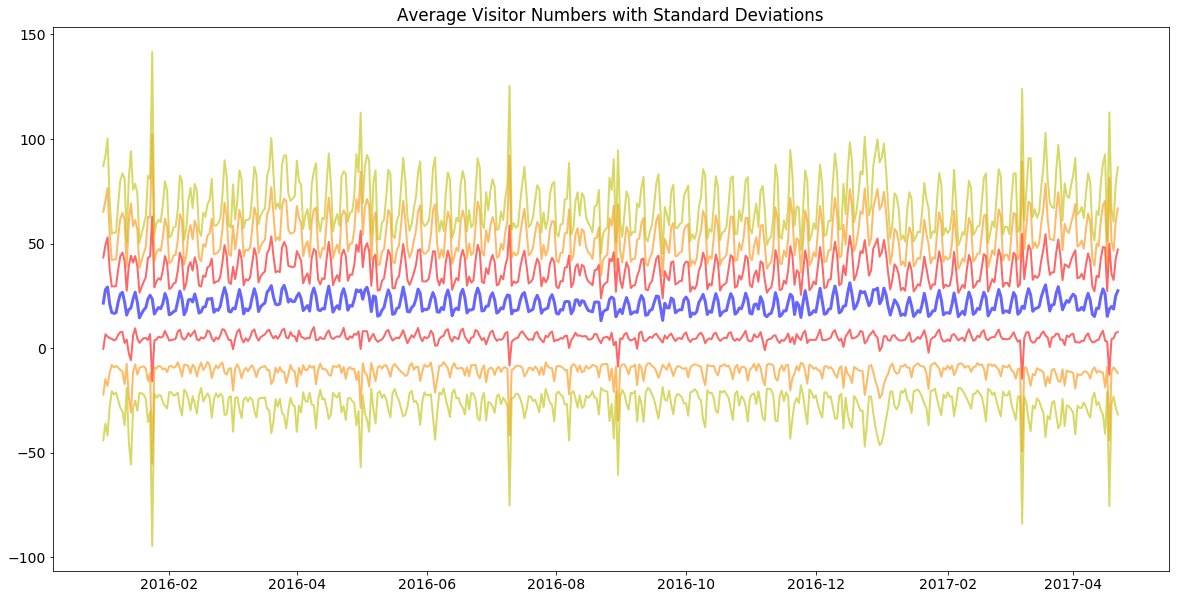

In [24]:
plt.figure(figsize=(20,10))
plt.plot(air_visit.groupby('visit_date').mean()['visitors'], linewidth=3, alpha=0.6\
        , color='b')
plt.plot(visitor_stats['stdev1'], color='r', linewidth=2, alpha=0.6)
plt.plot(visitor_stats['stdev2'], color='darkorange', linewidth=2, alpha=0.6)
plt.plot(visitor_stats['stdev3'], color='y', linewidth=2, alpha=0.6)
plt.plot(visitor_stats['stdev1n'], color='r', linewidth=2, alpha=0.6)
plt.plot(visitor_stats['stdev2n'], color='darkorange', linewidth=2, alpha=0.6)
plt.plot(visitor_stats['stdev3n'], color='y', linewidth=2, alpha=0.6)
plt.title('Average Visitor Numbers with Standard Deviations')

## add weekly averages
## compare (plot) reservations with actual visits
## let's see the NY Times API

## read prop

## Evaluation part

## Problem introduction 

## Added data - weather, exchange, ddd

/Users/derin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning:

indexing past lexsort depth may impact performance.

/Users/derin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning:

indexing past lexsort depth may impact performance.



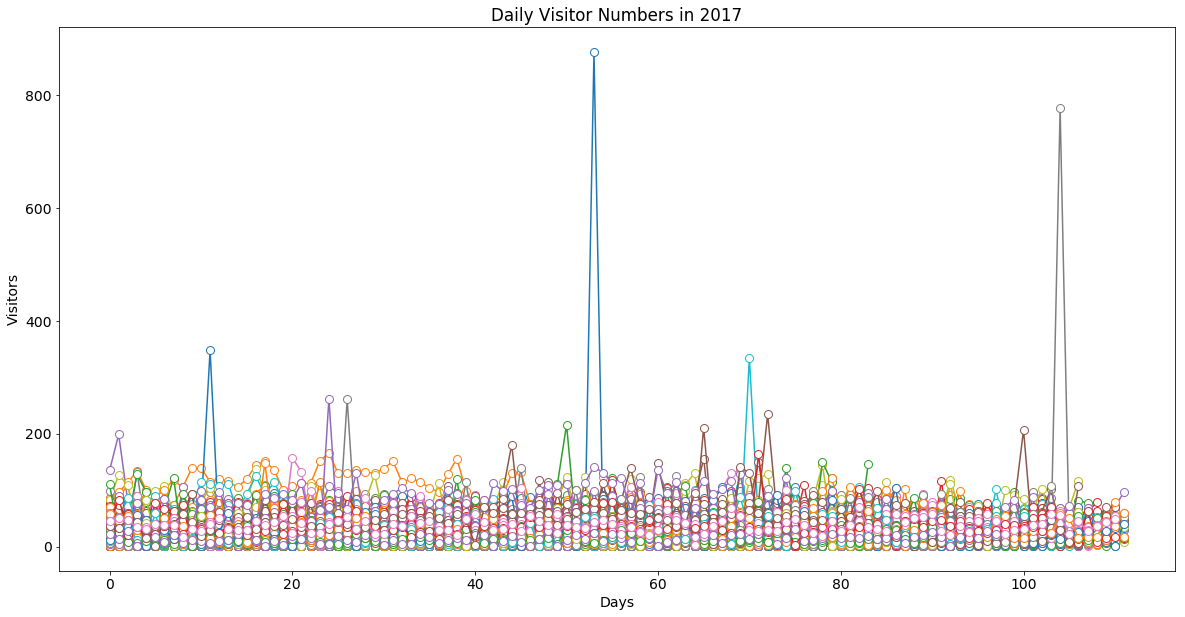

In [25]:
plt.figure(figsize=(20,10))
## plot the average number of visitors across all restaurants
# plt.plot(avg_num_visitor, linewidth=6, color='b')
day_avg = []

for rest in rest_2017:
    day_avg.append(np.average(np.array(air_visit_rest.loc[rest, 2017].groupby('visit_date').sum()['visitors'])))
    ## plot the total number of daily visitors for each restaurant
    plt.plot(np.array(air_visit_rest.loc[rest, 2017].groupby('visit_date').sum()['visitors']), marker='o', markersize=8, markerfacecolor='white',\
            linewidth=1.5, )
    
    plt.title('Daily Visitor Numbers in 2017')
    plt.xlabel('Days')
    plt.ylabel('Visitors')
    
# plt.plot(days_2017, day_avg, linewidth=6, color='b')

/Users/derin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning:

indexing past lexsort depth may impact performance.



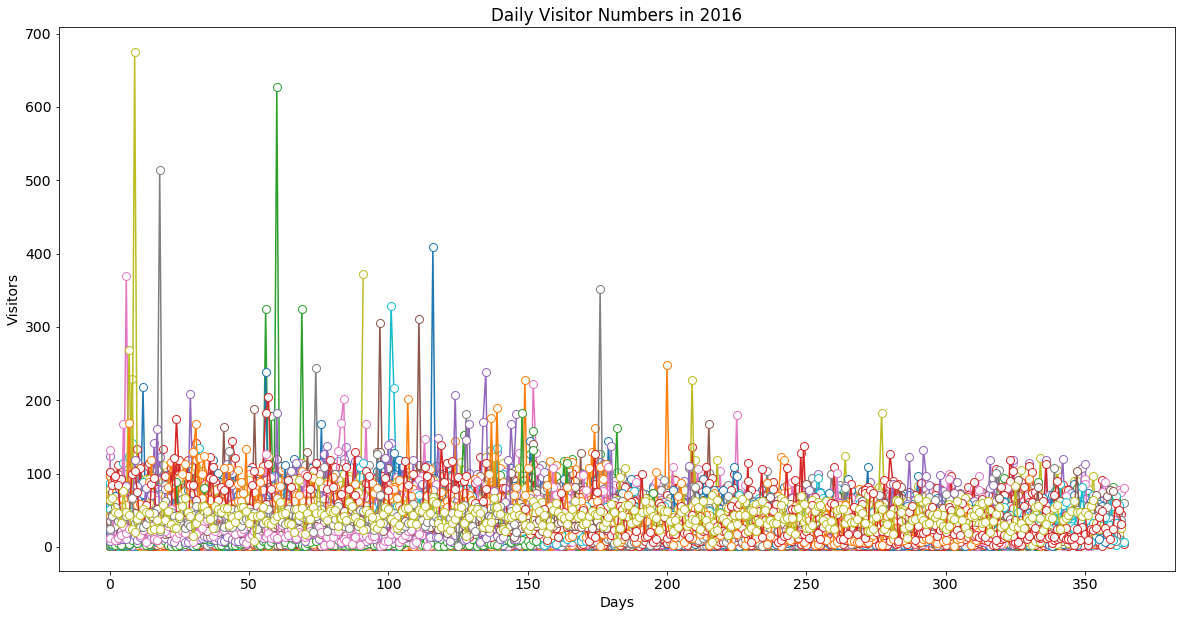

In [26]:
plt.figure(figsize=(20,10))
## plot the average number of visitors across all restaurants


for rest in rest_2016:
    ## plot the total number of daily visitors for each restaurant
    plt.plot(list(air_visit_rest.loc[rest, 2016]['visitors']), marker='o', markersize=8, markerfacecolor='white',\
            linewidth=1.5)
    plt.title('Daily Visitor Numbers in 2016')
    plt.xlabel('Days')
    plt.ylabel('Visitors')

In [22]:
## Plot monthly boxplot

## Reservation Data

In [27]:
# working with air_reserve and hpg_reserve
print (air_reserve.columns)
print (hpg_reserve.columns)

Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors'],
      dtype='object')
Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors'],
      dtype='object')


(-5, 60)

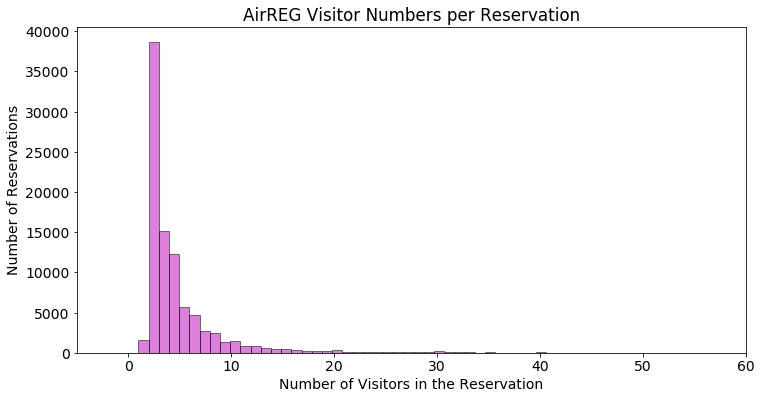

In [28]:
plt.figure(figsize=(12,6))
plt.hist(air_reserve['reserve_visitors'],bins=100, color='m', alpha=0.5, edgecolor='black')
# plt.hist(hpg_reserve['reserve_visitors'],bins=100, color='y', alpha=0.5, edgecolor='black')
plt.rcParams['font.size'] = 14
plt.title('AirREG Visitor Numbers per Reservation')
plt.xlabel('Number of Visitors in the Reservation')
plt.ylabel('Number of Reservations')
plt.xlim(-5, 60)

(-5, 60)

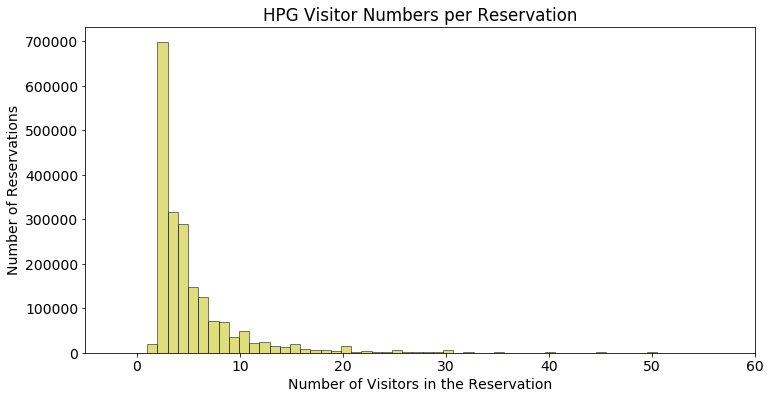

In [29]:
## Note the y values are much higher than AirREG's y values
plt.figure(figsize=(12,6))
plt.hist(hpg_reserve['reserve_visitors'],bins=100, color='y', alpha=0.5, edgecolor='black')
plt.rcParams['font.size'] = 14
plt.title('HPG Visitor Numbers per Reservation')
plt.xlabel('Number of Visitors in the Reservation')
plt.ylabel('Number of Reservations')
plt.xlim(-5, 60)

In [33]:
hpg_reserve['visit_datetime'] = hpg_reserve['visit_datetime'].apply\
(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

hpg_reserve.head()

TypeError: strptime() argument 1 must be str, not Timestamp

In [34]:
hpg_reserve['visit_datetime'][0]

Timestamp('2016-01-01 11:00:00')

In [ ]:
## Plot the average number of reservations and visitors per day for HPG
## Load air data
# air_reserve = pd.DataFrame(pd.read_csv('data/air_reserve.csv'))
# air_store = pd.DataFrame(pd.read_csv('data/air_store_info.csv'))
# air_visit = pd.DataFrame(pd.read_csv('data/air_visit_data.csv'))
# ## Load hpg data
# hpg_reserve = pd.DataFrame(pd.read_csv('data/hpg_reserve.csv'))
# hpg_store = pd.DataFrame(pd.read_csv('data/hpg_store_info.csv'))
# ## Load other data
# store_id =  pd.DataFrame(pd.read_csv('data/store_id_relation.csv'))
# date_info = pd.DataFrame(pd.read_csv('data/date_info.csv'))

air_reserve.head()

In [ ]:
## merge air reserve and hpg reserve with air store data

In [35]:
air_store.head()

air_store_id  air_genre_name                 air_area_name  \
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen   

    latitude   longitude  
0  34.695124  135.197852  
1  34.695124  135.197852  
2  34.695124  135.197852  
3  34.695124  135.197852  
4  35.658068  139.751599

In [36]:
hpg_store.head()

hpg_store_id  hpg_genre_name                  hpg_area_name  \
0  hpg_6622b62385aec8bf  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
1  hpg_e9e068dd49c5fa00  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
2  hpg_2976f7acb4b3a3bc  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
3  hpg_e51a522e098f024c  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
4  hpg_e3d0e1519894f275  Japanese style  Tōkyō-to Setagaya-ku Taishidō   

    latitude   longitude  
0  35.643675  139.668221  
1  35.643675  139.668221  
2  35.643675  139.668221  
3  35.643675  139.668221  
4  35.643675  139.668221

In [37]:
hpg_reserve.head()

hpg_store_id      visit_datetime     reserve_datetime  \
0  hpg_c63f6f42e088e50f 2016-01-01 11:00:00  2016-01-01 09:00:00   
1  hpg_dac72789163a3f47 2016-01-01 13:00:00  2016-01-01 06:00:00   
2  hpg_c8e24dcf51ca1eb5 2016-01-01 16:00:00  2016-01-01 14:00:00   
3  hpg_24bb207e5fd49d4a 2016-01-01 17:00:00  2016-01-01 11:00:00   
4  hpg_25291c542ebb3bc2 2016-01-01 17:00:00  2016-01-01 03:00:00   

   reserve_visitors  
0                 1  
1                 3  
2                 2  
3                 5  
4                13

In [38]:
air_visit.head()

air_store_id visit_date  visitors  month  year
0  air_ba937bf13d40fb24 2016-01-13        25      1  2016
1  air_ba937bf13d40fb24 2016-01-14        32      1  2016
2  air_ba937bf13d40fb24 2016-01-15        29      1  2016
3  air_ba937bf13d40fb24 2016-01-16        22      1  2016
4  air_ba937bf13d40fb24 2016-01-18         6      1  2016

In [39]:
store_id.head()

air_store_id          hpg_store_id
0  air_63b13c56b7201bd9  hpg_4bc649e72e2a239a
1  air_a24bf50c3e90d583  hpg_c34b496d0305a809
2  air_c7f78b4f3cba33ff  hpg_cd8ae0d9bbd58ff9
3  air_947eb2cae4f3e8f2  hpg_de24ea49dc25d6b8
4  air_965b2e0cf4119003  hpg_653238a84804d8e7

## Weather Data 
We can merge the data from weather stations with the data that comes directly from hpg and air by using store ids. 

In [40]:
hpg_weather_station = pd.DataFrame(pd.read_csv('data/rrv-weather-data/hpg_store_info_with_nearest_active_station.csv'))
hpg_ws_dist = pd.DataFrame(pd.read_csv('data/rrv-weather-data/hpg_station_distances.csv'))

air_weather_station = pd.DataFrame(pd.read_csv('data/rrv-weather-data/air_store_info_with_nearest_active_station.csv'))
air_ws_dist = pd.DataFrame(pd.read_csv('data/rrv-weather-data/air_station_distances.csv'))

In [41]:
## We might want to get rid of either vincenty or great circle - they measure the same thing with different formulas
hpg_weather_station.head()

hpg_store_id  hpg_genre_name                  hpg_area_name  \
0  hpg_6622b62385aec8bf  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
1  hpg_e9e068dd49c5fa00  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
2  hpg_2976f7acb4b3a3bc  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
3  hpg_e51a522e098f024c  Japanese style  Tōkyō-to Setagaya-ku Taishidō   
4  hpg_e3d0e1519894f275  Japanese style  Tōkyō-to Setagaya-ku Taishidō   

    latitude   longitude        latitude_str       longitude_str  \
0  35.643675  139.668221  "35.6436746642265"  "139.668220854814"   
1  35.643675  139.668221  "35.6436746642265"  "139.668220854814"   
2  35.643675  139.668221  "35.6436746642265"  "139.668220854814"   
3  35.643675  139.668221  "35.6436746642265"  "139.668220854814"   
4  35.643675  139.668221  "35.6436746642265"  "139.668220854814"   

                       station_id  station_latitude  station_longitude  \
0  tokyo__setagaya-kana__setagaya         35.626667             139.62   
1  tokyo__setagaya-kana__setagaya         35.626667             139.62   
2  tokyo__setagaya-kana__setagaya         35.626667             139.62   
3  tokyo__setagaya-kana__setagaya         35.626667             139.62   
4  tokyo__setagaya-kana__setagaya         35.626667             139.62   

   station_vincenty  station_great_circle  
0          4.757932              4.751874  
1          4.757932              4.751874  
2          4.757932              4.751874  
3          4.757932              4.751874  
4          4.757932              4.751874

In [42]:
## I do not know whether we really need this
hpg_ws_dist.head()

station_id  station_latitude  \
0                aichi__ai-xi-kana__isaai         35.216667   
1                    aichi__aki-kana__azo         35.078333   
2          aichi__centrair-kana__centrair         34.858333   
3  aichi__chapel-mountain-kana__chaw-yama         35.220000   
4          aichi__gamagori-kana__gamagori         34.845000   

   station_longitude  (35.6436746642265, 139.668220854814)  \
0         136.698333                            273.807155   
1         137.413333                            214.313880   
2         136.805000                            274.745122   
3         137.660000                            188.315295   
4         137.216667                            240.071397   

   (34.8299255519268, 134.67307503026)  (35.6686002312873, 139.763042710922)  \
0                           189.740365                            282.725621   
1                           251.796992                            223.331674   
2                           195.009654                            283.765888   
3                           275.990497                            197.315052   
4                           232.657816                            249.079769   

   (33.576378885814, 130.339313030944)  (35.7049600607628, 139.828642317999)  \
0                           612.251950                            289.253536   
1                           671.824800                            230.175685   
2                           612.414101                            290.652680   
3                           697.208269                            204.066820   
4                           649.076974                            256.067699   

   (34.3921061951814, 132.461913549062)  (35.7504730896129, 139.668412382952)  \
0                            398.263483                            275.946323   
1                            459.751286                            217.965106   
2                            401.582653                            278.584673   
3                            484.364745                            191.518327   
4                            438.899233                            244.574215   

                   ...                   (34.3874999304076, 132.661308799626)  \
0                  ...                                             380.665886   
1                  ...                                             441.858496   
2                  ...                                             383.540877   
3                  ...                                             466.582708   
4                  ...                                             420.815832   

   (34.8192452150664, 135.455217027399)  (35.2286300184325, 138.616270553172)  \
0                            121.721628                            174.611730   
1                            181.155722                            110.868817   
2                            123.535588                            170.286723   
3                            206.070761                             87.062216   
4                            161.150492                            134.613593   

   (37.838267244892, 139.104301421225)  (33.459353333184, 130.501845827137)  \
0                           361.992653                           602.451284   
1                           341.702177                           661.181614   
2                           389.763469                           601.466270   
3                           318.025164                           686.816272   
4                           372.855680                           637.885929   

   (34.5343100355169, 135.574890561587)  (37.5704782355036, 138.873286079977)  \
0                            127.592239                            326.005262   
1                            178.717437                            306.027812   
2                            118.299929                            353.750375   
3                            205.241088                  

In [43]:
air_weather_station.head()

air_store_id  air_genre_name                 air_area_name  \
0  air_0f0cdeee6c9bf3d7  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
1  air_7cc17a324ae5c7dc  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
2  air_fee8dcf4d619598e  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
3  air_a17f0778617c76e2  Italian/French  Hyōgo-ken Kōbe-shi Kumoidōri   
4  air_83db5aff8f50478e  Italian/French  Tōkyō-to Minato-ku Shibakōen   

    latitude   longitude  latitude_str  longitude_str  \
0  34.695124  135.197852  "34.6951242"  "135.1978525"   
1  34.695124  135.197852  "34.6951242"  "135.1978525"   
2  34.695124  135.197852  "34.6951242"  "135.1978525"   
3  34.695124  135.197852  "34.6951242"  "135.1978525"   
4  35.658068  139.751599  "35.6580681"  "139.7515992"   

                   station_id  station_latitude  station_longitude  \
0     hyogo__kobe-kana__koube         34.696667         135.211667   
1     hyogo__kobe-kana__koube         34.696667         135.211667   
2     hyogo__kobe-kana__koube         34.696667         135.211667   
3     hyogo__kobe-kana__koube         34.696667         135.211667   
4  tokyo__tokyo-kana__tonokyo         35.691667         139.750000   

   station_vincenty  station_great_circle  
0          1.277232              1.274882  
1          1.277232              1.274882  
2          1.277232              1.274882  
3          1.277232              1.274882  
4          3.730672              3.739835

In [44]:
## I do not know whether we really need this
air_ws_dist.head()

station_id  station_latitude  \
0                aichi__ai-xi-kana__isaai         35.216667   
1                    aichi__aki-kana__azo         35.078333   
2          aichi__centrair-kana__centrair         34.858333   
3  aichi__chapel-mountain-kana__chaw-yama         35.220000   
4          aichi__gamagori-kana__gamagori         34.845000   

   station_longitude  (34.6951242, 135.1978525)  (35.6580681, 139.7515992)  \
0         136.698333                 148.760474                 281.515494   
1         137.413333                 206.934423                 222.009692   
2         136.805000                 148.219287                 282.425838   
3         137.660000                 232.290097                 196.028930   
4         137.216667                 185.551102                 247.697421   

   (33.5892157, 130.3928134)  (35.6465721, 139.6532473)  \
0                 607.092649                 272.519535   
1                 666.658179                 213.104447   
2                 607.247882                 273.551438   
3                 692.042696                 187.076948   
4                 643.912231                 238.921222   

   (34.7053617, 135.5100252)  (35.6617773, 139.7040506)  \
0                 122.458285                 277.332264   
1                 178.827179                 217.995118   
2                 119.736543                 278.447541   
3                 204.483249                 191.950202   
4                 156.985300                 243.820606   

   (35.6995657, 139.6364379)            ...              \
0                 272.027251            ...               
1                 213.408094            ...               
2                 273.969304            ...               
3                 187.129755            ...               
4                 239.699305            ...               

   (35.6593968, 139.6964402)  (35.7073985, 139.6638354)  \
0                 276.609347                 274.623848   
1                 217.259269                 216.034963   
2                 277.710659                 276.596655   
3                 191.217373                 189.752619   
4                 243.082615                 242.322439   

   (35.7322863, 139.710247)  (35.7081457, 139.666288)  \
0                279.264891                274.857241   
1                220.890195                216.271701   
2                281.470456                276.833511   
3                194.555239                189.988814   
4                247.261222                242.559212   

   (34.7660929, 135.6280998)  (35.6641222, 139.729426)  \
0                 109.752891                279.641615   
1                 166.759508                220.271694   
2                 108.166411                280.714921   
3                 192.213288                194.241747   
4                 145.621391                246.058667   

   (43.0568187, 141.3539573)  (33.2119674, 130.5579082)  \
0                 958.556680                 607.836336   
1                 948.829872                 665.113006   
2                 991.479630                 604.982787   
3                 926.532369                 691.125370   
4                 979.300432                 640.934369   

   (34.6876966, 135.4954131)  (35.6532174, 139.7110363)  
0                 124.564101                 277.803513  
1                 180.605171                 218.332602  
2                 121.363420                 278.761144  
3                 206.337505                 192.333514  
4                 158.536737                 244.071522  

[5 rows x 111 columns]

### The Actual Weather Measurements

In [58]:
## example measurement 
pd.DataFrame(pd.read_csv('data/rrv-weather-data/measurements/aichi__ai-xi-kana__isaai.csv')).head()

calendar_date  avg_temperature  high_temperature  low_temperature  \
0    2016-01-01              6.0              11.0              0.7   
1    2016-01-02              4.7              10.5              0.0   
2    2016-01-03              7.0              13.8              1.9   
3    2016-01-04              8.8              14.7              2.7   
4    2016-01-05              8.9              14.1              3.4   

   precipitation  hours_sunlight  solar_radiation  deepest_snowfall  \
0            0.0             9.1              NaN               NaN   
1            0.0             6.8              NaN               NaN   
2            0.0             8.6              NaN               NaN   
3            0.0             5.3              NaN               NaN   
4            0.0             4.5              NaN               NaN   

   total_snowfall  avg_wind_speed  avg_vapor_pressure  avg_local_pressure  \
0             NaN             2.9                 NaN                 NaN   
1             NaN             1.4                 NaN                 NaN   
2             NaN             1.4                 NaN                 NaN   
3             NaN             2.2                 NaN                 NaN   
4             NaN             2.7                 NaN                 NaN   

   avg_humidity  avg_sea_pressure  cloud_cover  
0           NaN               NaN          NaN  
1           NaN               NaN          NaN  
2           NaN               NaN          NaN  
3           NaN               NaN          NaN  
4           NaN               NaN          NaN

We don't actually have any data for many columns including total_snowfall, avg_vapor_pressure etc. Dropping the columns, where all values are NaN from all measurement data. 

In [47]:
import os

In [48]:
def dropcols(data):
    data = data.dropna(axis=1, how='all')

In [51]:
## Writing all the measurements to a filelist (there are many measurements)
def air_station_list(path):
    file_list = os.listdir(path)[1:]
    return file_list

In [55]:
# air_station_list('data/rrv-weather-data/measurements/') ## works

In [70]:
## overwriting the csv files without the nan columns
for measurement_stat in air_station_list('data/rrv-weather-data/measurements/'): 
    ## get the full path
    station_path = 'data/rrv-weather-data/measurements/' + measurement_stat
    ## read each file to a df, drop nan cols and overwrite
    pd.DataFrame(pd.read_csv(station_path)).dropna(axis=1, how='all').to_csv(station_path)

In [68]:
## check nans
pd.DataFrame(pd.read_csv('data/rrv-weather-data/measurements/aichi__gamagori-kana__gamagori.csv')).head(10)

## can get rid of unnamed0 and unnamed1, lots of cols for a lot of data

Unnamed: 0  Unnamed: 0.1 calendar_date  avg_temperature  high_temperature  \
0           0             0    2016-01-01              6.6              11.2   
1           1             1    2016-01-02              8.8              12.7   
2           2             2    2016-01-03             10.8              14.3   
3           3             3    2016-01-04             12.1              15.9   
4           4             4    2016-01-05             10.0              14.1   
5           5             5    2016-01-06              9.4              12.1   
6           6             6    2016-01-07              8.4              12.3   
7           7             7    2016-01-08              7.1              10.3   
8           8             8    2016-01-09              6.8              11.4   
9           9             9    2016-01-10              7.3              11.5   

   low_temperature  precipitation  hours_sunlight  avg_wind_speed  
0              2.5            0.0             9.4             2.4  
1              5.5            0.0             8.3             2.1  
2              5.1            0.0             5.7             1.9  
3              6.7            0.0             8.8             2.1  
4              6.4            0.0             5.0             2.3  
5              6.9            0.0             1.6             2.1  
6              5.4            0.0             7.9             2.5  
7              4.0            0.0             4.1             1.9  
8              3.1            0.0             9.1             2.0  
9              3.6            0.0             8.7             2.4

In [71]:
for measurement_stat in air_station_list('data/rrv-weather-data/measurements/'): 
    ## get the full path
    station_path = 'data/rrv-weather-data/measurements/' + measurement_stat
    ## read each file to a df, drop problematic cols and overwrite
    pd.DataFrame(pd.read_csv(station_path)).drop(['Unnamed: 0', 'Unnamed: 0.1'], 1).to_csv(station_path)

In [73]:
## Set Unnamed: 0 as index for each df in the future 
pd.DataFrame(pd.read_csv('data/rrv-weather-data/measurements/aichi__gamagori-kana__gamagori.csv'))\
.set_index('Unnamed: 0', drop=True).head(10)

calendar_date  avg_temperature  high_temperature  low_temperature  \
Unnamed: 0                                                                     
0             2016-01-01              6.6              11.2              2.5   
1             2016-01-02              8.8              12.7              5.5   
2             2016-01-03             10.8              14.3              5.1   
3             2016-01-04             12.1              15.9              6.7   
4             2016-01-05             10.0              14.1              6.4   
5             2016-01-06              9.4              12.1              6.9   
6             2016-01-07              8.4              12.3              5.4   
7             2016-01-08              7.1              10.3              4.0   
8             2016-01-09              6.8              11.4              3.1   
9             2016-01-10              7.3              11.5              3.6   

            precipitation  hours_sunlight  avg_wind_speed  
Unnamed: 0                                                 
0                     0.0             9.4             2.4  
1                     0.0             8.3             2.1  
2                     0.0             5.7             1.9  
3                     0.0             8.8             2.1  
4                     0.0             5.0             2.3  
5                     0.0             1.6             2.1  
6                     0.0             7.9             2.5  
7                     0.0             4.1             1.9  
8                     0.0             9.1             2.0  
9                     0.0             8.7             2.4